In [4]:
import pandas as pd
import FinanceDataReader as fdr

## 개별 종목 일별 시세 수집

In [29]:
df = fdr.StockListing("KOSPI")

In [67]:
# 삼성전자 티커
df[df.Name.str.contains(r'^삼성.*전자$')]["Symbol"]

3986    005930
Name: Symbol, dtype: object

In [85]:
df = fdr.DataReader('005930', "2017", "2020")

In [83]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


<AxesSubplot:xlabel='Date'>

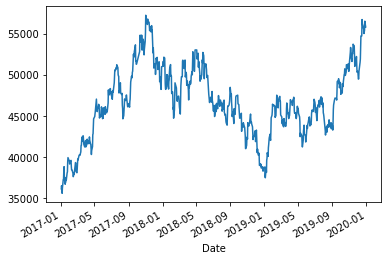

In [86]:
df["Close"].plot()

In [88]:
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(7213, 10)

In [91]:
df_krx[["Symbol", "Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [102]:
df_krx.loc[df_krx["Name"] == "하이브", "Symbol"].tolist()[0]

'352820'

In [138]:
def item_code_by_item_name(item_name):
    global df_krx
    
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        return item_code_list[0]
    else:
        return False

In [143]:
print(item_code_by_item_name("카카오뱅크"))

323410


In [144]:
item_code_by_item_name("셀트리온")

'068270'

In [147]:
# fdr.DataReader(item_code_by_item_name("LG화학"))

## 종목명으로 일별 시세 가져오기

In [157]:
def find_item_list(item_name, year=2020):
    item_code  = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [156]:
find_item_list("삼성전자")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2021-10-25,69900,70600,69500,70200,10029621,-0.002841
2021-10-26,70600,71500,70400,71100,10528252,0.012821
2021-10-27,71000,71000,70000,70100,10295316,-0.014065


In [158]:
stock_daily = find_item_list("하이브")

In [159]:
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2021-10-25,324500,329500,319000,326000,248602,0.003077
2021-10-26,328000,347000,325500,342000,716852,0.049080
2021-10-27,343000,349500,337000,348500,429359,0.019006


<AxesSubplot:xlabel='Date'>

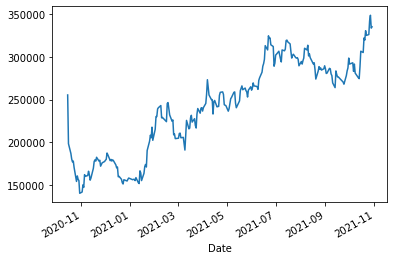

In [162]:
stock_daily["Close"].plot()

<AxesSubplot:xlabel='Date'>

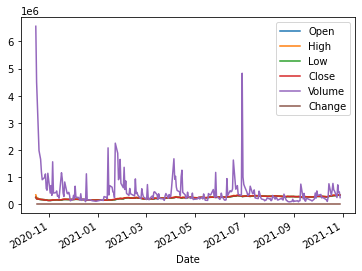

In [163]:
stock_daily.plot()

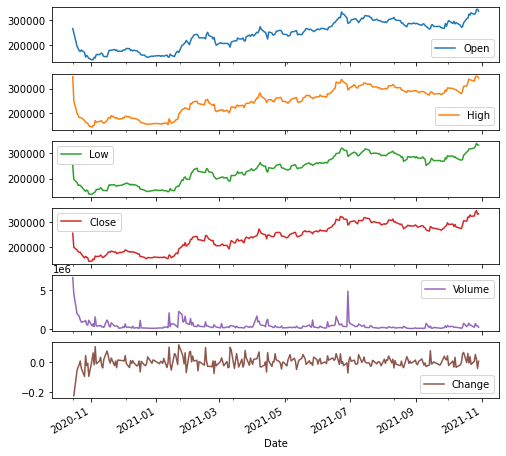

In [167]:
# 변수를 할당하면 로그 없이 그래프만 나오게 할 수 있음
g = stock_daily.plot(subplots=True, figsize=(8,8))

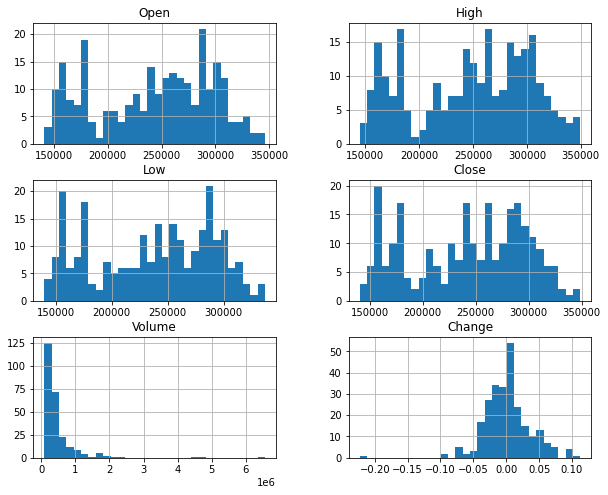

In [172]:
h = stock_daily.hist(figsize=(10,8), bins=30)

<AxesSubplot:xlabel='Date'>

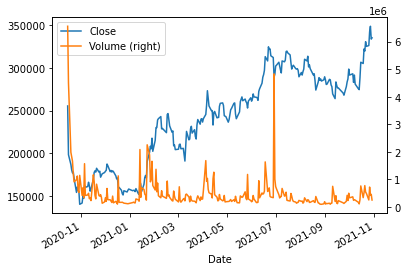

In [174]:
stock_daily[["Close", "Volume"]].plot(secondary_y="Volume")

### 과학적 기수법
* 참고 : E notation
[과학적 기수법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B3%BC%ED%95%99%EC%A0%81_%EA%B8%B0%EC%88%98%EB%B2%95)

과학적 기수법, 과학적 표기법(scientific notation, scientific form, standard index form, standard form)은 너무 크거나 너무 작은 숫자들을 십진법으로 편하게 작성하여 표현하는 방법이다. 과학자, 수학자, 공학자들이 공통적으로 사용하는데, 부분적인 이유는 특정한 산술을 단순화시켜 주기 때문이다. 과학 계산기에서는 "SCI" 디스플레이 모드라는 이름으로 알려져 있다.

In [176]:
format(1e6, ",")

'1,000,000.0'

In [179]:
format(10**6, ",")

'1,000,000'